In [40]:
import warnings
warnings.filterwarnings("ignore")

In [53]:
# this method fetch data from the backend; triggered by url call
# fetch data allows you to query from the body argument

import requests

def twitter_text_freq(year:int, month:int):
    """
    URL trigger of the backend fission function that does NLP analysis on Twitter-text

    Parameters:
    - year (int): The year to filter by.
    - month (int): The month to filter by.

    Returns:
    - A dict of frequencies of words in the given year and month
    
    Warning:
    - data only contains year 2021 and 2022, other input will return a string of warning
    """
    
    url = f'http://127.0.0.1:9090/twitter?year={year}&month={month}'
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()  # Correctly parsing the JSON response
    else:
        return f"Failed to fetch data: Status code {response.status_code}"

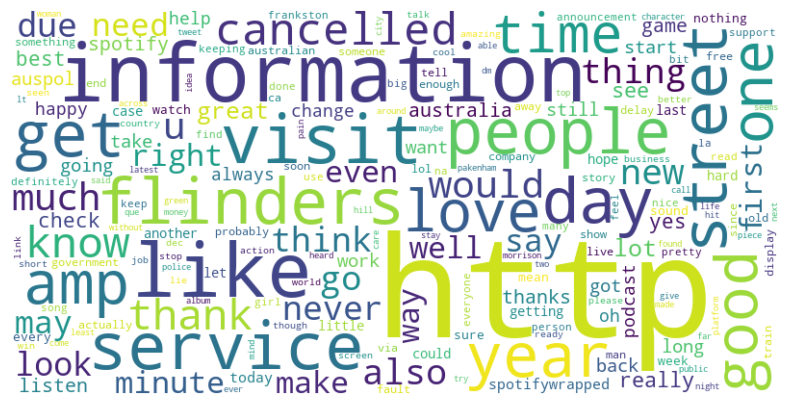

In [54]:
# what does people talks about on Twitter during Christmas?
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_freq = twitter_text_freq(year=2021, month=12)
def generate_word_cloud(word_freq):
    """
    Generate and display a word cloud based on a word frequency dictionary.

    Parameters:
    - word_freq (dict): A dictionary where keys are words and values are the frequencies of these words.
    """
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    # Display the generated image:
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")  # Do not show axes to keep it clean
    plt.show()

generate_word_cloud(word_freq)